# The Power Domination Toolbox
#### Johnathan Koch, Youngstown State University,
#### Beth (Bjorkman) Morrison, Air Force Research Lab

The following listing comprises the Power Domination Toolbox. Each cell is prefaced by a description of what is contained in teh following cell. Each function definition is followed by an example, if one is available, to demonstrate the function.

The first cell here makes sure that all the dependencies are installed in the correct order using the sys package inherent to python.

In [1]:
# if __name__ == '__main__':
#     import sys
#     !{sys.executable} -m pip install --upgrade pip
#     !{sys.executable} -m pip install --upgrade Pillow
#     !{sys.executable} -m pip install scipy
#     !{sys.executable} -m pip install networkx
#     !{sys.executable} -m pip install numpy
#     !{sys.executable} -m pip install matplotlib==3.5.1

The next cell ensures that all the required modules are loaded.

itertools is needed for the combinations method.

networkx is needed because graphs.

numpy is needed for eigenvalue calculation.

math is needed for the ceiling function.

multiprocessing is needed so that the work can be completed on multiple cpus.

copy is needed so that graph modifications are done to copies of graphs and not the graphs themselves.

os is needed to detect if the program should load a previous state or start from the beginning.

pickle is used to save power dominating sets to file

In [2]:
import itertools as it
import networkx as nx
import numpy as np
import time
import math
import multiprocessing
import copy
import os
import pickle

The following are needed just for the jupyter notebook examples.

importlib is required to refresh the power domination toolbox import periodically

matplotlib.pyplot is needed just in the jupyter notebook implementation to show multiple graphs in the same cell

The power power domination toolbox is required due to a limitation in the jupyter notebook environment that prevents processes from being spawned.

In [3]:
import importlib
import matplotlib.pyplot as plt
import PowerDominationToolbox as PDT

The following cells define some usefull graphs that will periodically be used as example graphs.

NewEnglandGraph is a representations of the New England power grid as available in the MATPOWER toolbox for MATLAB. The edges were extracted from "test_system_10gen.m" file directly with a text editor and exported to a networkx adjacency list.

As a note, we will use nx.draw_kamada_kawai() as the graph drawing function so as to be certain that the graph drawing is consistent between cells.

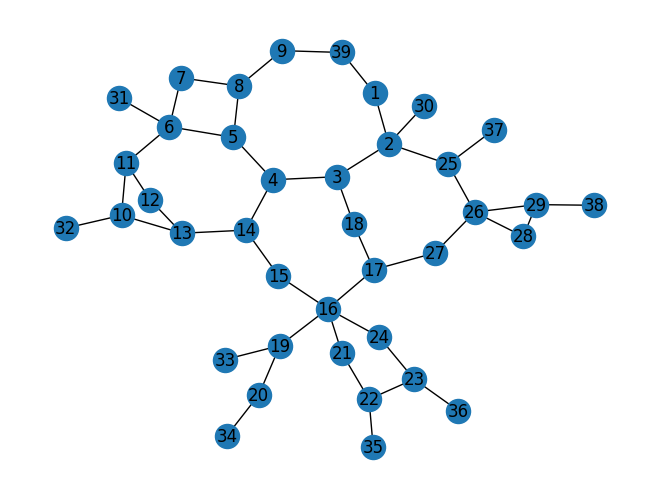

In [4]:
def NewEnglandGraph():
    return nx.parse_adjlist(['1 2 39', '2 3 25 30', '39 9', '3 4 18', '25 26 37', '4 5 14', '18 17', '5 6 8', '14 13 15', '6 7 11 31', '8 7 9', '11 10 12', '10 13 32', '13 12', '15 16', '16 17 19 21 24', '17 27', '19 20 33', '21 22', '24 23', '27 26', '20 34', '22 23 35', '23 36', '26 28 29', '28 29', '29 38'])

if __name__ == '__main__':
    nx.draw_kamada_kawai(NewEnglandGraph(), with_labels = True)

IEEE118 is a representation of the standard IEEE test system with 118 busses.

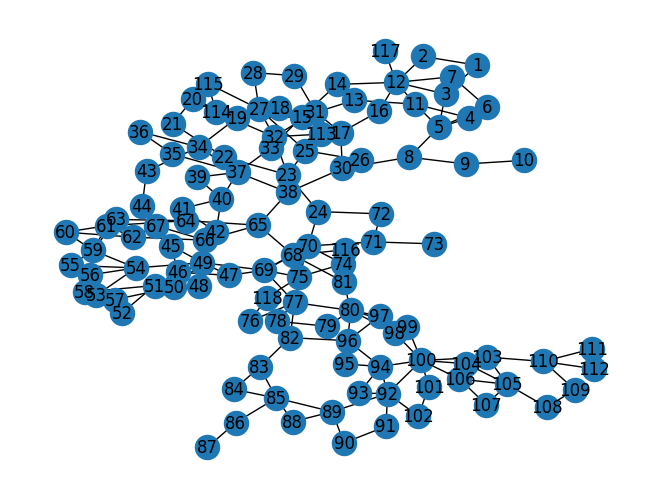

In [5]:
def IEEE118():
    return nx.parse_adjlist(['1 2 3', '2 12', '3 5 12', '4 5 11', '5 6 11 8', '6 7', '7 12', '8 9 30', '9 10', '11 12 13', '12 14 16 117', '13 15', '14 15', '15 17 19 33', '16 17', '17 18 31 113 30', '18 19', '19 20 34', '20 21', '21 22', '22 23', '23 24 25 32', '24 70 72', '25 27 26', '26 30', '27 28 32 115', '28 29', '29 31', '30 38', '31 32', '32 113 114', '33 37', '34 36 37 43', '35 36 37', '37 39 40 38', '38 65', '39 40', '40 41 42', '41 42', '42 49', '43 44', '44 45', '45 46 49', '46 47 48', '47 49 69', '48 49', '49 50 51 54 66 69', '50 57', '51 52 58', '52 53', '53 54', '54 55 56 59', '55 56 59', '56 57 58 59', '59 60 61 63', '60 61 62', '61 62 64', '62 66 67', '63 64', '64 65', '65 66 68', '66 67', '68 69 81 116', '69 70 75 77', '70 71 74 75', '71 72 73', '74 75', '75 77 118', '76 77 118', '77 78 80 82', '78 79', '79 80', '80 96 97 98 99 81', '82 83 96', '83 84 85', '84 85', '85 86 88 89', '86 87', '88 89', '89 90 92', '90 91', '91 92', '92 93 94 100 102', '93 94', '94 95 96 100', '95 96', '96 97', '98 100', '99 100', '100 101 103 104 106', '101 102', '103 104 105 110', '104 105', '105 106 107 108', '106 107', '108 109', '109 110', '110 111 112', '114 115'])

if __name__ == '__main__':
    nx.draw_kamada_kawai(IEEE118(), with_labels = True)

ZimGraph is an example graph for demonstrating particular methods and their use in the overall program.

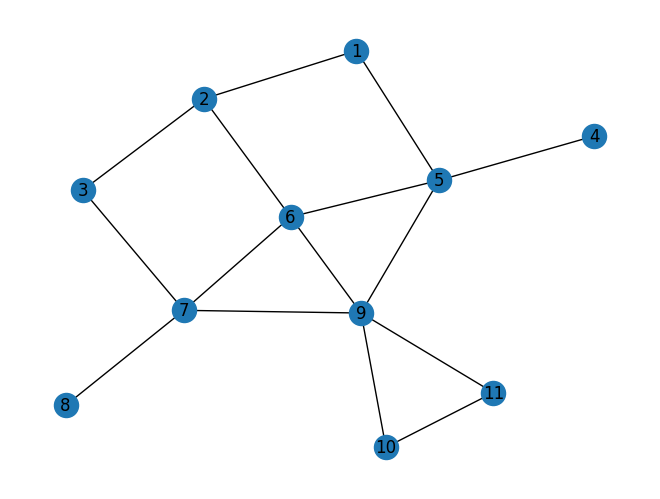

In [6]:
def ZimGraph():
    return nx.parse_adjlist(['1 2 5', '2 3 6', '3 7', '4 5', '5 6 9', '6 7 9', '7 8 9', '9 10 11', '10 11'])

if __name__ == '__main__':
    nx.draw_kamada_kawai(ZimGraph(), with_labels = True)

ExtendedZimGraph is a modification of the ZimGraph with extended terminal paths and cycles.

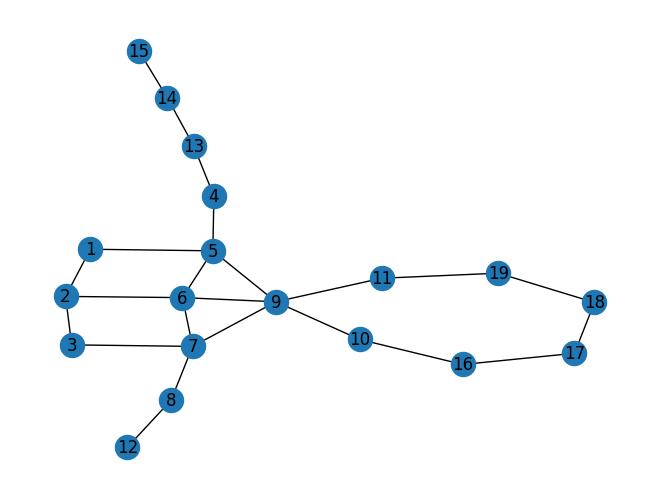

In [7]:
def MutatedZimGraph():
    return nx.parse_adjlist(['1 2 5', '2 6 3', '5 4 6 9', '6 7 9', '3 7', '7 8 9', '15 14', '14 13', '13 4', '9 10 11', '8 12', '10 16', '11 19', '16 17', '19 18', '17 18'])

if __name__ == '__main__':
    nx.draw_kamada_kawai(MutatedZimGraph(), with_labels = True)

BarbellGraph is a classical graph that is 2K_4 connected by a P_4.

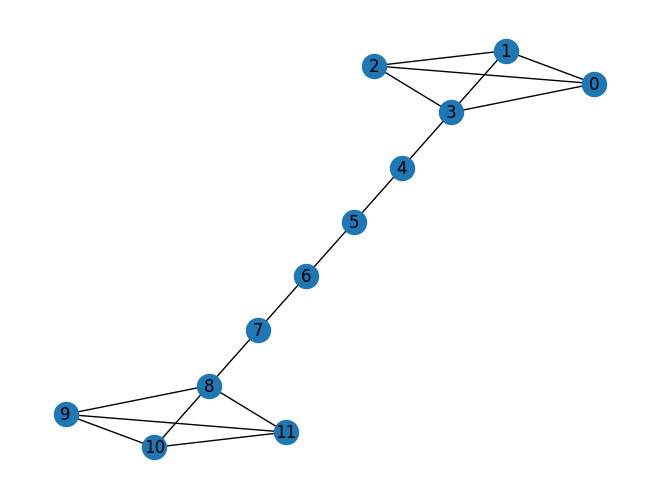

In [8]:
def BarbellGraph():
    return nx.parse_adjlist(['0 1 2 3', '1 2 3', '2 3', '3 4', '4 5', '5 6', '6 7', '7 8', '8 9 10 11', '9 10 11', '10 11'])

if __name__ == '__main__':
    nx.draw_kamada_kawai(BarbellGraph(), with_labels = True)

Below is the redesigned zeros game function. The inputs are a networkx graph, and a list of vertices within this graph to be initially colored blue (SeedSet). As a note, SeedSet is a list of whichever data type the vertices in the graph are. If node names are strings, then SeedSet must be a list of strings, if node names are tuples, then SeekSet must be a list of tuples.

Propagation continues as follows:

If a colored vertex is adjacent to exactly one uncolored vertex, the uncolored vertex becomes colored. This Propagation continues until either the entire graph is colored or no other vertices can be colored.

This function is a rewrite of the function found at https://github.com/jasongrout/minimum_rank/blob/master/minrank.py entitled "zerosgame" with variable names changed for clarity, as well as commentary to match other methods in this toolbox.

In [9]:
def ZeroForce(Graph, SeedSet):
    #INPUT
    #
    #Graph - a networkx graph object
    #   This is used as the graph to play the zero forcing game on
    #SeedSet - a list object containing networkx vertex objects
    #   This is used as the initially colored vertices
    #
    #OUTPUT
    #
    #Blues - a set object containing networkx vertex objects
    #   This is the result after propagating the seed set until no more propagating steps can be taken

    #To implement zero forcing the algorithm needs to keep track of active, inactive, and neighbors of blue vertices
    NewBlues = set(SeedSet)
    Blues = set()
    BlueNeighbors = {}
    ActiveBlues = set()
    InactiveBlues = set()
    
    #To be sure we try to zero force at least once, we set the flag for coloring to true
    HaveColored = True
    
    while HaveColored:
        
        #Now we continue zero forcing until we don't color any vertices
        HaveColored = False
        
        #Now we update the set of blues with the vertices colored in the last iteration of the loop
        Blues.update(NewBlues)
        ActiveBlues.update(NewBlues)
        ActiveBlues.difference_update(InactiveBlues)
        
        #Now we update the list of neighbors to blue vertices and clear the NewBlues and InactiveBlues for this iteration
        BlueNeighbors.update([[Vertex, set(Graph.neighbors(Vertex)).difference(Blues)] for Vertex in NewBlues])
        NewBlues.clear()
        InactiveBlues.clear()
        
        #Now we check if any of the active blue vertices can zero force
        for Vertex in ActiveBlues:
            BlueNeighbors[Vertex].difference_update(Blues)
            
            #If the vertex has exactly one uncolored neighbor, then we flag it for coloring and set the flag that we have colored in this iteration of the loop
            if len(BlueNeighbors[Vertex]) == 1:
                NewBlues.add(BlueNeighbors[Vertex].pop())
                InactiveBlues.add(Vertex)
                HaveColored = True
                
    return Blues

To demonstrate ZeroForce, we will start with two adjacent vertices of a cycle graph colored blue. This then results in the entire graph being colored.

The initial seed set is ['0', '1', '2'], and after propagating the set of blue vertices is {'6', '3', '1', '8', '0', '2', '7', '4', '5'}. The following graph indicates the initial set (yellow), blue vertices resulting from zero-forcing (light blue), and non-blue vertices (light grey)


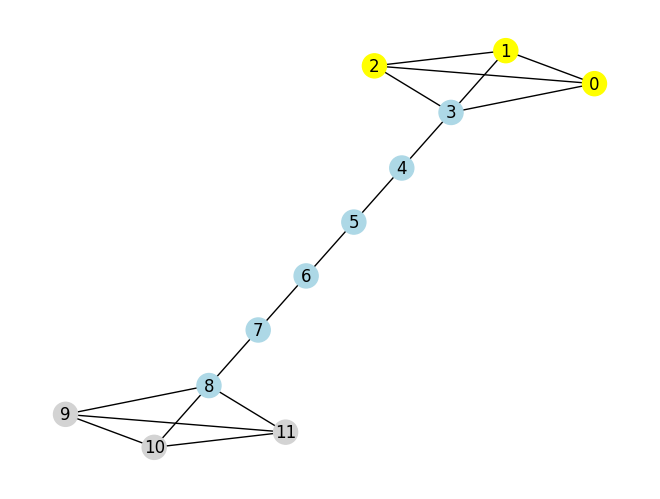

In [10]:
if __name__ == '__main__':
    ExampleGraph = BarbellGraph()

    SeedSet = ["0", "1", "2"]

    EndSet = ZeroForce(ExampleGraph, SeedSet)

    print(f"The initial seed set is {SeedSet}, and after propagating the set of blue vertices is {EndSet}. The following graph indicates the initial set (yellow), blue vertices resulting from zero-forcing (light blue), and non-blue vertices (light grey)")

    ColorMap = [
        "yellow" if vertex in SeedSet
        else
            "lightblue" if vertex in EndSet else
            "lightgrey"
        for vertex in ExampleGraph.nodes()
    ]

    nx.draw_kamada_kawai(ExampleGraph, node_color=ColorMap, with_labels=True)

Next we define a function that performs graph domination. The input is a networkx graph object and a list of vertices within this graph to be initially colored blue. As a note, SeedSet is a list that contains variables of whichever type the nodes in the supplied graph are keyed with. Often in this workbook vertices will be either integers or strings, though tuples are common in the case for graph products.

Propagation continues as follows:

All neighbors of the initial list of vertices are colored blue.

In [11]:
def Dominate(Graph, SeedSet):
    #INPUT
    #
    #Graph - a networkx graph object
    #   This is used as the graph to power dominate on
    #SeedSet - a set object containing networkx vertex objects
    #   This is used as the initially colored vertices (before the domination step)
    #
    #OUTPUT
    #
    #DominatedBlues - a list object containing networkx vertex objects
    #   This is the result after propagating the seed set

    Blues = set(SeedSet)
    DominatedBlues = set(SeedSet)
    
    [DominatedBlues.add(Neighbor) for Vertex in Blues for Neighbor in nx.neighbors(Graph,Vertex)]
    
    return list(DominatedBlues)

To demonstrate Dominate, we observe that dominating on a single node in the clique of the barbell graph, the entire clique is colored blue.

With the input of ['0'], the domination step yields ['3', '1', '0', '2'] on the barbell example graph. The following graph indicates the initial set (yellow), blue vertices resulting from dominating (light blue), and non-blue vertices (light grey)


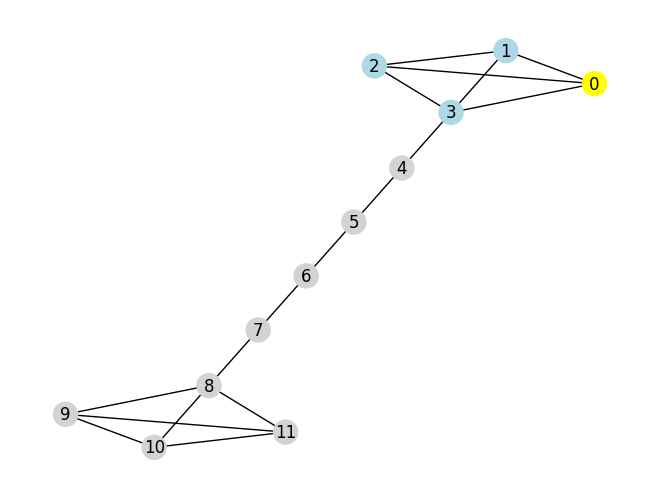

In [12]:
if __name__ == '__main__':
    ExampleGraph = BarbellGraph()

    SeedSet = ["0"]

    EndSet = Dominate(ExampleGraph, SeedSet)

    print(f"With the input of {SeedSet}, the domination step yields {EndSet} on the barbell example graph. The following graph indicates the initial set (yellow), blue vertices resulting from dominating (light blue), and non-blue vertices (light grey)")
    
    ColorMap = [
        "yellow" if vertex in SeedSet
        else
            "lightblue" if vertex in EndSet else
            "lightgrey"
        for vertex in ExampleGraph.nodes()
    ]

    nx.draw_kamada_kawai(ExampleGraph, node_color=ColorMap, with_labels = True)

This function performs the power domination algorithm by way of the two step process outlined by Haynes at. al.

In [13]:
def PowerDominate(Graph, SeedSet):
    #INPUT
    #
    #Graph - a networkx graph object
    #   This is used as the graph to power dominate on
    #SeedSet - a set object containing networkx vertex objects
    #   This is used as the initially colored vertices (before the domination step)
    #
    #OUTPUT
    #
    #a set of vertices that are the result of power domination on the input graph with the input seed set

    #First, color the initial set of vertices to start with
    Blues = list(SeedSet)
    
    #Second, color the neighbors of the initial set of vertices (domination step)
    DominatedBlues = Dominate(Graph, Blues)
        
    #Third, we play the zero forcing game
    Blues = ZeroForce(Graph, DominatedBlues)
    
    return Blues

To demonstrate PowerDominate, we observe that power dominating on a single node in the clique of the barbell graph, the entire clique is colored blue, as well as the long path.

With the input of ['0'], the power domination algorithm yields {'6', '3', '1', '8', '0', '2', '7', '4', '5'} on the barbell example graph. The following graph indicates the initial set (yellow), blue vertices resulting from power dominating (light blue), and non-blue vertices (light grey)


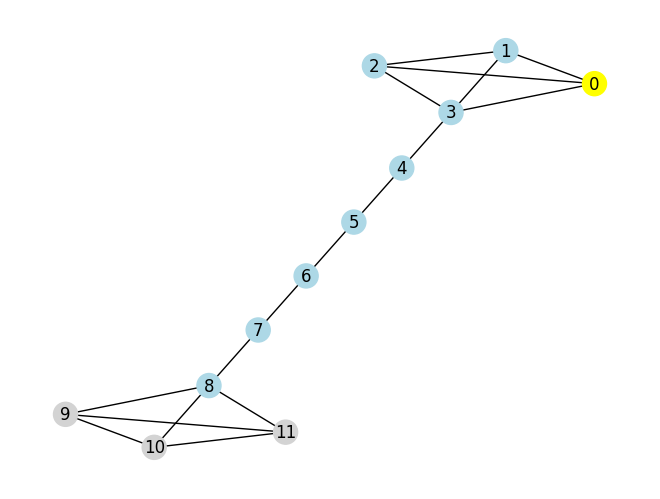

In [14]:
if __name__ == '__main__':
    ExampleGraph = BarbellGraph()

    SeedSet = ["0"]

    EndSet = PowerDominate(ExampleGraph, SeedSet)

    print(f"With the input of {SeedSet}, the power domination algorithm yields {EndSet} on the barbell example graph. The following graph indicates the initial set (yellow), blue vertices resulting from power dominating (light blue), and non-blue vertices (light grey)")
    
    ColorMap = [
        "yellow" if vertex in SeedSet
        else
            "lightblue" if vertex in EndSet else
            "lightgrey"
        for vertex in ExampleGraph.nodes()
    ]

    nx.draw_kamada_kawai(ExampleGraph, node_color=ColorMap, with_labels = True)

isPDS is the agglomerative function that uses the new zero forcing algorithm, and domination from above. When a graph and a seed set are input, a value of true is returned if the seed set is a power dominating set and false otherwise.

As a note, SeedSet is a list that contains variables of whichever type the nodes in the supplied graph are keyed with. Often in this workbook vertices will be either integers or strings, though tuples are common in the case for graph products.

In [15]:
def isPDS(Graph, SeedSet):
    #INPUT
    #
    #Graph - a networkx graph object
    #   This is used as the graph to power dominate on
    #SeedSet - a set object containing networkx vertex objects
    #   This is used as the initially colored vertices (before the domination step)
    #
    #OUTPUT
    #
    #True or False, depending on whether the supplied set of vertices is a power dominating set (PDS for short) for the given graph

    #First, color the initial set of vertices to start with
    Blues = list(SeedSet)
    
    #Second, color the neighbors of the initial set of vertices (domination step)
    DominatedBlues = Dominate(Graph, Blues)
        
    #Third, we play the zero forcing game
    Blues = ZeroForce(Graph, DominatedBlues)

    #Now if the entire graph is blue, then we found a power dominating set!
    if len(Blues) == Graph.number_of_nodes():
        return True
    else:
        return False

To demonstrate isPDS, we observe a vertex in one of the cliques of the barbell graph is not a power dominating set, while a vertex in each of the cliques is a power dominating set.

['0'] is not a power dominating set of the barbell graph.
['0', '11'] is a power dominating set of the barbell graph.


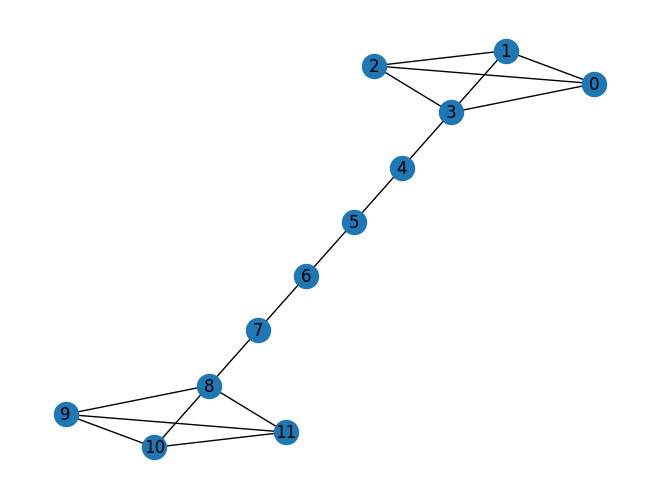

In [16]:
if __name__ == '__main__':
    ExampleGraph = BarbellGraph()

    SeedSet = ["0"]

    print(f"{SeedSet} is {'' if isPDS(ExampleGraph, SeedSet) else 'not '}a power dominating set of the barbell graph.")

    SeedSet = ["0","11"]

    print(f"{SeedSet} is {'' if isPDS(ExampleGraph, SeedSet) else 'not '}a power dominating set of the barbell graph.")

    nx.draw_kamada_kawai(ExampleGraph, with_labels = True)

The following functions are all helper functions that focus the search for power dominating sets. 

DeletedConnectedComponents is a helper function to power domination. This returns a list of connected graph components that are the result of deleting the supplied vertex. This is used for determining vertices with terminal cycles and terminal paths.

As a note, the supplied vertex is of whichever type the nodes in the supplied graph are keyed with. Often in this workbook vertices will be either integers or strings, though tuples are common in the case for graph products.

In [17]:
def _DeletedConnectedComponents(Graph, Vertex):
    #INPUT
    #
    #Graph - a networkx graph object
    #   This is used as the graph under inspection
    #Vertex - a networkx vertex object
    #   This is used to be the vertex that is removed
    #
    #OUTPUT
    #
    #a list object that contains networkx graph objects
    
    #First, we copy the graph just in case, so we never alter the original graph
    VertexDeleted = Graph.copy()
    
    #Second, we remove the indicated veretex
    VertexDeleted.remove_node(Vertex)
    
    #This is copied directly from the documentation on how to make a list of the connected components of a graph
    return [VertexDeleted.subgraph(component).copy() for component in nx.connected_components(VertexDeleted)]

To demonstrate DeletedConnectedComponents, we observe that deleting a vertex in the central path of the barbell graph yields two connected components

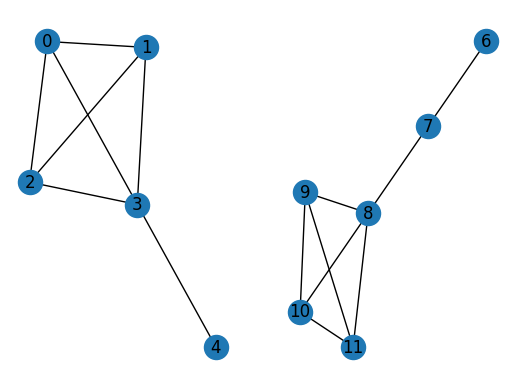

In [18]:
if __name__ == '__main__':
    ExampleGraph = BarbellGraph()
    
    fix,axes = plt.subplots(1,2)

    [nx.draw_kamada_kawai(component, with_labels=True, ax=axes[i]) for i,component in enumerate(_DeletedConnectedComponents(ExampleGraph, "5"))]

isPath is a helper function to power domination. This function returns true if the input graph is a path.

In [19]:
def isPath(Graph):
    #INPUT
    #
    #Graph - a networkx graph object
    #   This is used as the graph under inspection
    #
    #OUTPUT
    #
    #True or False, depending on whether the graph is a cycle or not
    
    #First, paths must be connected
    if not nx.is_connected(Graph):
        return False
    
    #Then we check to see if there are only vertices of degree 1 and 2 (or in the edge cases of P_2 only degree 1 and the trivial graph only degree 0)
    VertexDegrees = set(Degree for (Vertex, Degree) in Graph.degree())
    if VertexDegrees == {1, 2} or VertexDegrees == {1} or VertexDegrees == {0}:
        return True
    else:
        return False

To demonstrate isPath, we observe that C_4 is not a path while P_4 is a path.

In [20]:
if __name__ == '__main__':
    ExampleGraph = nx.cycle_graph(4)

    print(f"C_4 is {'' if isPath(ExampleGraph) else 'not '}a path.")

    ExampleGraph = nx.path_graph(4)

    print(f"P_4 is {'' if isPath(ExampleGraph) else 'not '}a path.")

C_4 is not a path.
P_4 is a path.


NumTerminalPaths is a helper function to power domination. This returns the number of paths that emanate from the supplied vertex and terminate without connecting to vertices that return to the central component of the graph.

As a note, the supplied vertex is of whichever type the nodes in the supplied graph are keyed with. Often in this workbook vertices will be either integers or strings, though tuples are common in the case for graph products.

In [21]:
def _NumTerminalPaths(Graph, Vertex):
    #INPUT
    #
    #Graph - a networkx graph object
    #   This is used as the graph under inspection
    #Vertex - a networkx vertex object
    #   This is used to be the vertex that is removed
    #
    #OUTPUT
    #
    #an integer
    #   This represents the number of terminal paths that emanate from the supplied vertex
        
    return sum([isPath(nx.subgraph(Graph,set(Component.nodes()).union(set(Vertex)))) for Component in _DeletedConnectedComponents(Graph,Vertex)])

To demonstrate NumTerminalPaths, we observe vertices 5 and 7 each have 1 terminal cycle in the Zim graph.

Vertices 5 and 7 have 1 and 1 terminal paths respectively.
Vertex 9 has 0 terminal paths


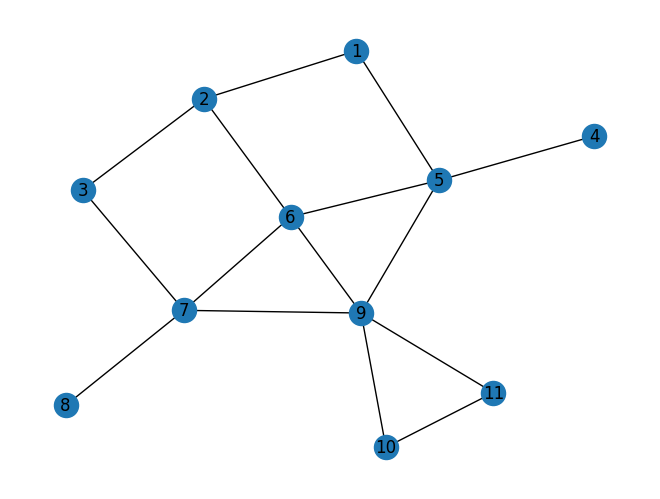

In [22]:
if __name__ == '__main__':
    ExampleGraph = ZimGraph()
    Vertex1 = "5"
    Vertex2 = "7"

    print(f"Vertices {Vertex1} and {Vertex2} have {_NumTerminalPaths(ExampleGraph, Vertex1)} and {_NumTerminalPaths(ExampleGraph, Vertex2)} terminal paths respectively.")

    Vertex3 = "9"
    print(f"Vertex {Vertex3} has {_NumTerminalPaths(ExampleGraph, Vertex3)} terminal paths")

    nx.draw_kamada_kawai(ExampleGraph, with_labels = True)

isCycle is a helper function to power domination. This function returns true if the input graph is a cycle.

In [23]:
def isCycle(Graph):
    #INPUT
    #
    #Graph - a networkx graph object
    #   This is used as the graph under inspection
    #
    #OUTPUT
    #
    #True or False, depending on whether the graph is a cycle or not
    
    #First, cycles must be connected
    if not nx.is_connected(Graph):
        return False
    
    #Then we check to see if there are only vertices of degree 2
    VertexDegrees = set(Degree for (Vertex, Degree) in Graph.degree())
    if VertexDegrees == {2}:
        return True
    else:
        return False

To demonstrate isCycle, we observe that C_4 is a cycle while P_4 is not a cycle.

In [24]:
if __name__ == '__main__':
    ExampleGraph = nx.cycle_graph(4)

    print(f"C_4 is {'' if isCycle(ExampleGraph) else 'not '}a cycle.")

    ExampleGraph = nx.path_graph(4)

    print(f"P_4 is {'' if isCycle(ExampleGraph) else 'not '}a cycle.")

C_4 is a cycle.
P_4 is not a cycle.


NumTerminalCycles is a helper function to power domination. This returns the number of cycles that emanate and terminate from the supplied vertex.

As a note, the supplied vertex is of whichever type the nodes in the supplied graph are keyed with. Often in this workbook vertices will be either integers or strings, though tuples are common in the case for graph products.

In [25]:
def _NumTerminalCycles(Graph, Vertex):
    #INPUT
    #
    #Graph - a networkx graph object
    #   This is used as the graph under inspection
    #Vertex - a networkx vertex object
    #   This is used as the vertex under inspection
    #
    #OUTPUT
    #
    #an integer
    #   This represents the number of terminal cycles that emanate from the supplied vertex
    
    return sum([isCycle(nx.subgraph(Graph,set(Component.nodes()).union(set(Vertex)))) for Component in _DeletedConnectedComponents(Graph,Vertex)])

To demonstrate NumTerminalCycles, we observe that vertex 9 of the Zim example graph has 1 terminal cycle whereas vertices 5 and 7 have no terminal cycles.

Vertices 5 and 7 have 0 and 0 terminal cycles respectively.
Vertex 9 has 1 terminal cycle


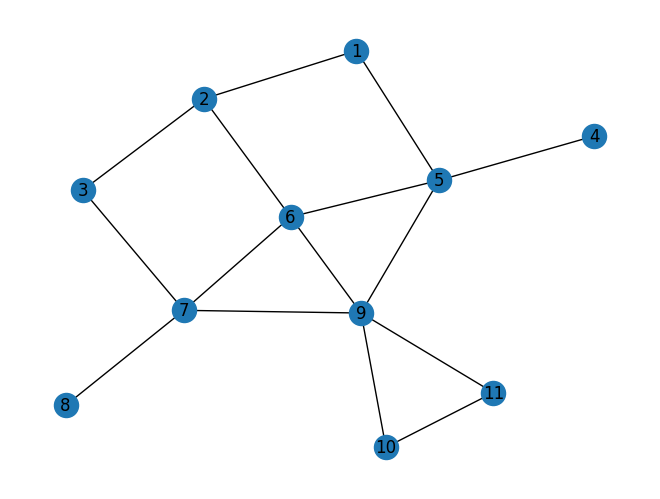

In [26]:
if __name__ == '__main__':
    ExampleGraph = ZimGraph()
    Vertex1 = "5"
    Vertex2 = "7"

    print(f"Vertices {Vertex1} and {Vertex2} have {_NumTerminalCycles(ExampleGraph, Vertex1)} and {_NumTerminalCycles(ExampleGraph, Vertex2)} terminal cycles respectively.")

    Vertex3 = "9"
    print(f"Vertex {Vertex3} has {_NumTerminalCycles(ExampleGraph, Vertex3)} terminal cycle")

    nx.draw_kamada_kawai(ExampleGraph, with_labels = True)

FindPreferredVertices is a helper function for power domination. This returns all cut vertices of a graph that completely power dominate one of their terminal forts with the help of _FPreferredFilter() to not return nodes in the terminal fort of a preferred vertex

In [27]:
def _FPreferredFilter(Graph, FPreferredVertices):
    #INPUT
    #
    #Graph - a networkx graph object
    #   This is used as the graph under inspection
    #
    #FPreferredVertices - a list of vertices that have a terminal fort that they alone power dominate
    #   This is used as the preferred vertices that we will filter out redundancies from
    #
    #OUTPUT
    #
    #This filters out any f=preferred vertices that are within the fort of other f=preferred vertices
    
    
    InactiveBlues = set()
    PreferredVertices = []

    # for each vertex in our list
    for vertex in FPreferredVertices:

        # and the vertex has non-blue neighbors
        if vertex not in InactiveBlues:

            # We add the vertex to our output list and recalculate the blue vertices
            PreferredVertices.append(vertex)
            InactiveBlues = set(inactive_blue for inactive_blue in set(Graph.nodes()).intersection(PowerDominate(Graph, PreferredVertices)) if Graph.degree(inactive_blue) == Graph.subgraph(PowerDominate(Graph, PreferredVertices)).degree(inactive_blue))
    return PreferredVertices


def _FindPreferredVertices(Graph):
    #INPUT
    #
    #Graph - a networkx graph object
    #   This is used as the graph under inspection - _ShrinkGraph() has already been applied to this graph, performing all valid contractions
    #
    #OUTPUT
    #
    #a list of vertices that have more than one terminal paths, and/or have a fort they power dominate (but aren't inactive while considering all previous preferred vertices)
    #
    #NOTE: this leverages that _ShrinkGraph() has already been called on the graph - so all terminal paths are just terminal leaves. If this function is called on a graph without first contracting the graph all terminal paths that are not leaves will be considered forts that make the associated cut vertex a f-preferred vertex
        
    Pref = set()
    
    # We iterate over all cut vertices
    for vertex in nx.articulation_points(Graph):
        num_leaves = 0
        vertex_deleted_subgraph = nx.induced_subgraph(Graph, set(Graph.nodes())-set((vertex,)))
        # we then iterate over the connected components of the vertex-deleted subgraph, checking for forts and leaves
        for connected_component_vertices in nx.connected_components(vertex_deleted_subgraph):
            # a leaf is a degree 1 vertex, which would leave the connected component being a single vertex
            if len(connected_component_vertices) == 1:
                num_leaves += 1
                # if this isn't the first leaf that's associated with this cut vertex, then the vertex is a b-preferred vertex
                if num_leaves == 2:
                    Pref.add(vertex)
                    break
            # assuming that the connected component isn't a leaf but the connected component is observed by the cut vertex, then the cut vertex is a f-preferred vertex
            elif connected_component_vertices.issubset(PowerDominate(Graph, set((vertex,)))):
                Pref.add(vertex)
        
    return _FPreferredFilter(Graph, Pref)

To demonstrate FindPreferredVertices, we inspect the Zim graph.

The list of preferred vertices in the Zim graph is: ['9']. The following shows the zim graph with the preferred vertices indicated (yellow).


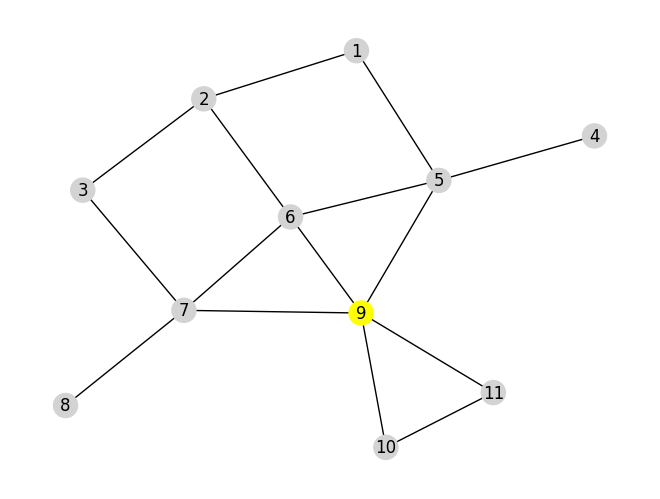

In [28]:
if __name__ == '__main__':
    ExampleGraph = ZimGraph()

    Preferred = _FindPreferredVertices(ExampleGraph)
    
    print(f"The list of preferred vertices in the Zim graph is: {Preferred}. The following shows the zim graph with the preferred vertices indicated (yellow).")

    ColorMap = [
        "yellow" if vertex in Preferred else "lightgrey" for vertex in ExampleGraph.nodes()
    ]

    nx.draw_kamada_kawai(ExampleGraph, node_color=ColorMap, with_labels=True)

This is the function that we use to sort the vertices. It is a bit more complicated than simply by degree, since vertices of the same degree will further be sorted by the distance to a preferred vertex.

As a note, the supplied vertex is of whichever type the nodes in the supplied graph are keyed with. Often in this workbook vertices will be either integers or strings, though tuples are common in the case for graph products.

In [29]:
def _DegreeDistanceRating(Graph, Vertex, PreferredVertices = None):
    #INPUT
    #
    #Graph - a networkx graph object
    #   This is used as the graph under inspection
    #Vertex - a networkx vertex object
    #   This is used as the vertex under inspection
    #PreferredVertices - a set object containing networkx vertex objects (defaults to an empty set)
    #   This is the set of vertices that are guaranteed to be in some minimum power dominating set, so we may as well force all of our potential power dominating sets to include these. If the default value is input, then the first thing that happens is we find call the FindPreferredVertices
    #
    #OUTPUT
    #
    #Value - a floating point number
    #   This value encodes the degree (as the integer component) and the distance from a preferred vertex (the fractional component)
    
    #If PreferredVertices is empty, we will make sure they should be empty by calling FindPreferredVertices
    if (PreferredVertices) is None:
        PreferredVertices = _FindPreferredVertices(Graph)
    
    #We first encode the degree of the vertex into the integer portion of the return value
    Value = Graph.degree(Vertex)
    if len(PreferredVertices) == 0:
        
        #If there aren't any preferred vertices, then we simply return the vertex's degree
        return Value
    else:
        #Otherwise, we append the minimum distance to a preferred vertex as the fractional component
        MinDistanceToPreferred = min([len(nx.shortest_path(Graph, source = Vertex, target = PreferredVertex)) for PreferredVertex in PreferredVertices])
        Value += 1 - (1/MinDistanceToPreferred)
        return Value

To demonstrate DegreeDistanceRating, we inspect the the Zim graph.

Vertex 1 has degree distance rating 2.666666666666667
Vertex 2 has degree distance rating 3.666666666666667
Vertex 5 has degree distance rating 4.5
Vertex 3 has degree distance rating 2.666666666666667
Vertex 6 has degree distance rating 4.5
Vertex 7 has degree distance rating 4.5
Vertex 4 has degree distance rating 1.6666666666666667
Vertex 9 has degree distance rating 5.0
Vertex 8 has degree distance rating 1.6666666666666667
Vertex 10 has degree distance rating 2.5
Vertex 11 has degree distance rating 2.5


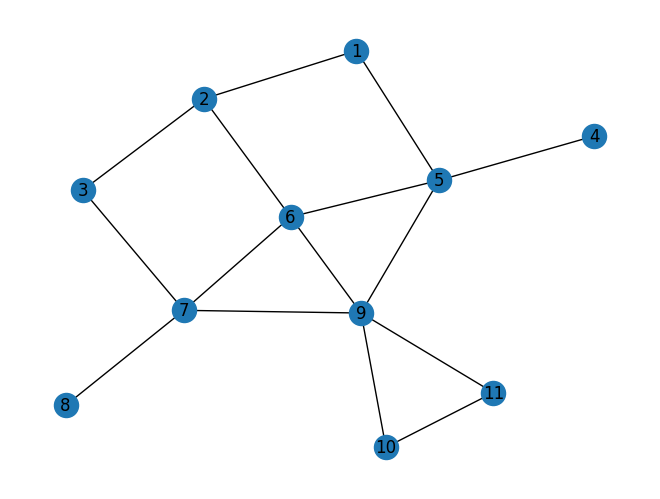

In [30]:
if __name__ == '__main__':
    ExampleGraph = ZimGraph()

    PreferredVertices = _FindPreferredVertices(ExampleGraph)
    
    [print(f"Vertex {Vertex} has degree distance rating {_DegreeDistanceRating(ExampleGraph, Vertex)}") for Vertex in ExampleGraph]

    nx.draw_kamada_kawai(ExampleGraph, with_labels = True)

TrimAndSortVertexSet is a helper function to power domination. There exists a valid minimum power dominating set that contains only vertices of degree 3 or higher when the maximum degree is 3+, so this function removes all vertices that are not degree 3 or higher. This function will sort vertices so that preferred vertices occur first, then the remaining vertices are sorted by their DegreeDistanceRating.

In [31]:
def _TrimAndSortVertexSet(Graph, PreferredVertices=None):
    #INPUT
    #
    #Graph - a networkx graph object
    #   This is used as the graph under inspection
    #PreferredVertices - a set object containing networkx vertex objects (defaults to an empty set)
    #   This is the set of vertices that are guaranteed to be in some minimum power dominating set, so we may as well force all of our potential power dominating sets to include these. If the default value is input, then the first thing that happens is we find call the FindPreferredVertices
    #
    #OUTPUT
    #
    #a list of networkx node components
    #   This has the highest degree vertices at the front of the list and only contains vertices of degree 3 or higher
    
    #First we sort the list of vertices by degree with high degree vertices first
    if PreferredVertices==None:
        PreferredVertices = _FindPreferredVertices(Graph)
    
    return [Vertex for Vertex in sorted(nx.nodes(Graph), key=lambda Vertex : _DegreeDistanceRating(Graph, Vertex, PreferredVertices), reverse=True) if Graph.degree(Vertex) >= 3]

To demonstrate TrimAndSortVertexSet, we inspect the Zim graph.

The list of vertices of degree 3 or higher, sorted by degree distance rating, for the Zim graph is ['9', '5', '6', '7', '2'].


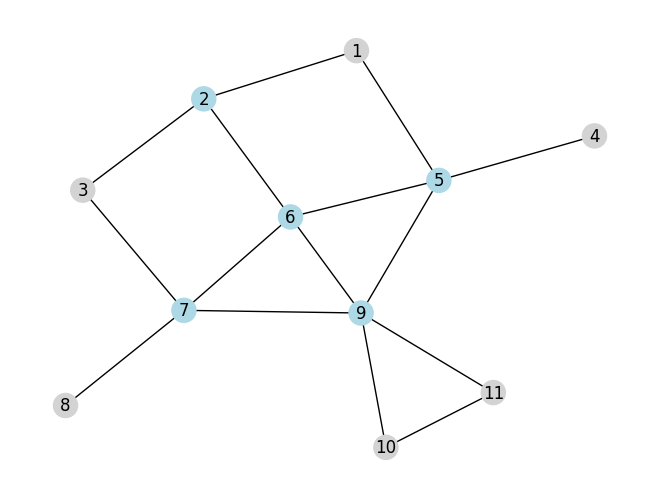

In [32]:
if __name__ == '__main__':
    ExampleGraph = ZimGraph()

    HighDegree = _TrimAndSortVertexSet(ExampleGraph)

    print(f"The list of vertices of degree 3 or higher, sorted by degree distance rating, for the Zim graph is {HighDegree}.")

    ColorMap = [
        "lightblue" if Vertex in HighDegree else
        "lightgrey" for Vertex in ExampleGraph.nodes()
    ]

    nx.draw_kamada_kawai(ExampleGraph, node_color=ColorMap, with_labels=True)

FindInactiveBlues is a helper function for power domination. Once we have located a set of vertices that we know are in some minimum power dominating set (preferred vertices), we can remove any vertices that will be colored and adjacent to no uncolored neighbors. Considering adding these vertices to our minimum power dominating set would be redundant.

In [33]:
def _FindInactiveBlues(Graph, PreferredVertices = None):
    #INPUT
    #
    #Graph - a networkx graph object
    #   This is used as the graph under inspection
    #PreferredVertices - a set object containing networkx vertex objects (defaults to an empty set)
    #   This is the set of vertices that are guaranteed to be in some minimum power dominating set, so we may as well force all of our potential power dominating sets to include these. If the default value is input, then the first thing that happens is we find call the FindPreferredVertices
    #
    #OUTPUT
    #
    #a list of networkx vertex objects
    #   These vertices may be omitted from consideration of minimum power dominating sets
    
    #If PreferredVertices is empty, we will make sure they should be empty by calling FindPreferredVertices
    if (PreferredVertices) is None:
        PreferredVertices = _FindPreferredVertices(Graph)
    
    #We initially perform the domination step from the preferred vertices
    DominatedBlues = Dominate(Graph, PreferredVertices)
    
    #We then zero force from this initial set
    FinalBlues = ZeroForce(Graph, DominatedBlues)
                
    #The vertices that have no uncolored neighbors are then the resulting list that we are interested in
    return [Vertex for Vertex in FinalBlues if Graph.degree(Vertex) == Graph.subgraph(FinalBlues).degree(Vertex)]

To demonstrate FindPreferredVertices, we inspect the Zim graph.

After power dominating with preferred vertices ['9'] on the Zim graph, we find that ['11', '6', '10', '9'] are inactive blues.


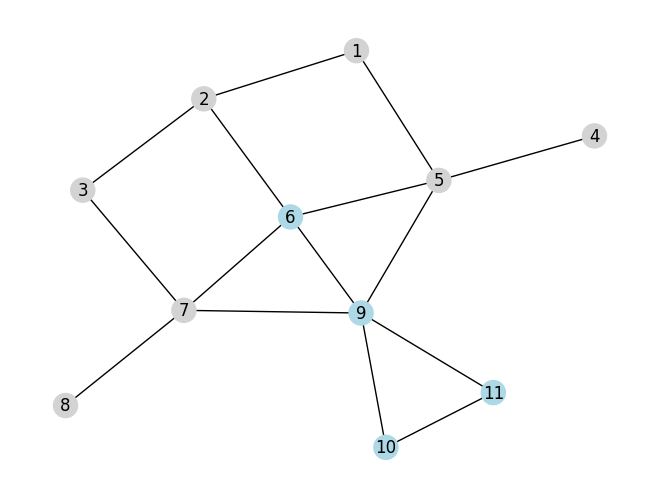

In [34]:
if __name__ == '__main__':
    ExampleGraph = ZimGraph()

    Inactive = _FindInactiveBlues(ExampleGraph, _FindPreferredVertices(ExampleGraph))

    print(f"After power dominating with preferred vertices {_FindPreferredVertices(ExampleGraph)} on the Zim graph, we find that {Inactive} are inactive blues.")

    ColorMap = [
        "lightblue" if Vertex in Inactive else
        "lightgrey" for Vertex in ExampleGraph.nodes()
    ]

    nx.draw_kamada_kawai(ExampleGraph, node_color=ColorMap, with_labels=True)

SortValidNonPreferredVertices is a helper function for power domination. This function removes the superfluous (inactive after power dominating from preferred) vertices from the list of vertices degree 3 or higher.

In [35]:
def _SortValidNonPreferredVertices(Graph, PreferredVertices=None):
    #INPUT
    #
    #Graph - a networkx graph object
    #   This is used as the graph under inspection
    #PreferredVertices - a set object containing networkx vertex objects (defaults to an empty set)
    #   This is the set of vertices that are guaranteed to be in some minimum power dominating set, so we may as well force all of our potential power dominating sets to include these. If the default value is input, then the first thing that happens is we find call the FindPreferredVertices
    #
    #OUTPUT
    #
    #ValidNonPreferredVertices - a list object of networkx vertex objects
    #   This is a list of all the non-preferred vertices, that aren't totally colored with no uncolored neighbors
    
    #First we need to gather the list of preferred vertices
    if PreferredVertices==None:
        PreferredVertices = _FindPreferredVertices(Graph)

    #Second we need to gather the list of inactive blue vertices
    InactiveBlues = _FindInactiveBlues(Graph, PreferredVertices)
    
    #Now we gather the list of vertices of degree 3 or higher (this by default also sorts the list)
    SortedVertices = _TrimAndSortVertexSet(Graph)
    
    #Now we iterate through the list of our sorted vertices, and if it is not a preferred vertex, then we append this to the list that we will end up returning
    ValidNonPreferredVertices = [Vertex for Vertex in SortedVertices if (Vertex not in PreferredVertices and Vertex not in InactiveBlues)]
            
    #As a fail safe, if there aren't any vertices, we'll just return all but the preferred vertices
    if len(ValidNonPreferredVertices) == 0:
        
        #We will alert to the command line that there are no valid non-preferred vertices
        assert RuntimeWarning("There happened to be no valid, non-preferred vertices")
        [ValidNonPreferredVertices.append(Vertex) for Vertex in nx.nodes(Graph)]

    #Finally, since we've iterated through all of the vertices, we can return the list we've constructed
    return ValidNonPreferredVertices

To demonstrate SortValidNonPreferredVertices, we observe that high degree vertices are at the front of the list, and vertices of the same degree further sorted by the ones farther from preferred vertices.

The valid vertices, sorted by DegreeDistanceRating of the Zim graph are: ['5', '7', '2']


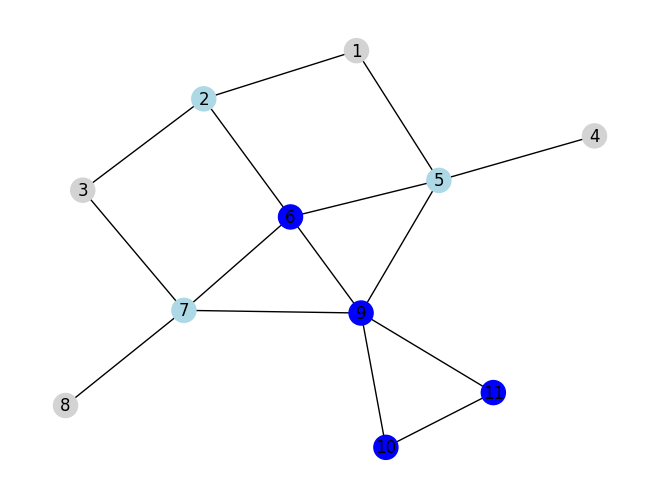

In [36]:
if __name__ == '__main__':
    ExampleGraph = ZimGraph()

    Valid = _SortValidNonPreferredVertices(ExampleGraph)

    print(f"The valid vertices, sorted by DegreeDistanceRating of the Zim graph are: {Valid}")

    ColorMap = [
        "lightblue" if Vertex in Valid
        else
            "blue" if Vertex in _FindInactiveBlues(ExampleGraph) else
            "lightgrey" for Vertex in ExampleGraph.nodes()
    ]

    nx.draw_kamada_kawai(ExampleGraph, node_color=ColorMap, with_labels=True)

GetLowDegVerts is a helper function for ShrinkGraph. This helper function returns all nodes of degree 1 or 2.

In [37]:
def _GetLowDegVerts(Graph):
    #INPUT
    #Graph - a networkx graph object
    #   This is used as the graph under inspection
    #
    #OUTPUT
    #a list of networkx node objects
    #   This is a list of all of the vertices that have degree 1 or 2 on the input graph
    
    return [Vertex for Vertex,Degree in Graph.degree() if Degree<3]

To demonstrate GetLowDegVerts, we inspect the Zim graph.

The low degree vertices of the Zim graph are ['1', '3', '4', '8', '10', '11']


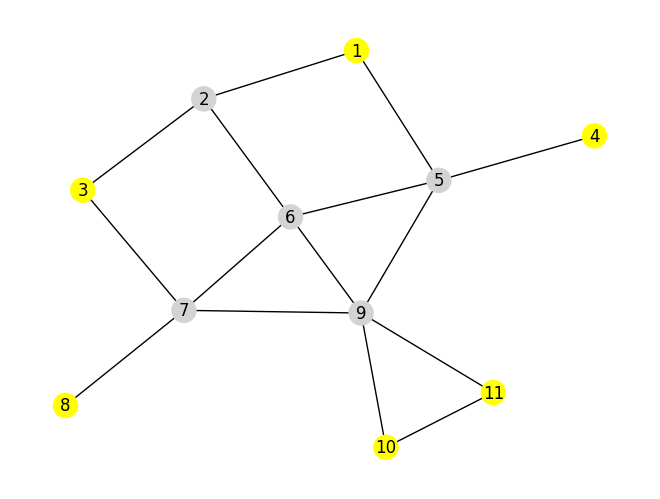

In [38]:
if __name__ == '__main__':
    ExampleGraph = ZimGraph()

    LowDegree = _GetLowDegVerts(ExampleGraph)

    print(f"The low degree vertices of the Zim graph are {LowDegree}")

    ColorMap = [
        "yellow" if Vertex in LowDegree else
        "lightgrey" for Vertex in ExampleGraph.nodes()
    ]

    nx.draw_kamada_kawai(ExampleGraph, node_color=ColorMap, with_labels=True)

ShortenPath is a helper function for ShrinkGraph. When provided with a path contained in the input graph, the input path is reduced to at most a P_2 with the same endpoints as in the input graph.

In [39]:
def _ShortenPath(Graph, Path):
    #INPUT
    #
    #Graph - a networkx graph object
    #   This is used as the graph under inspection
    #Path - a netwrokx graph object
    #   This is  the path to be shortened in the input graph
    #
    #OUTPUT
    #
    #GraphCopy - a networkx graph object
    #   This is the input graph, but with Path shortened to at most a P_2
    
    #First we have to check to see if the input path is actually a path
    if not isPath(Path):
        
        #If not then we cannot proceed
        raise nx.NetworkXNoPath('The input is not a path')
    else:
        #Remove all the degree 2 nodes
        Graph.remove_nodes_from([Vertex for Vertex in Path.nodes() if Path.degree(Vertex)==2])
                
        #Add an edge between the 2 remaining nodes
        RemainingNodes = [Vertex for Vertex in Path.nodes() if Path.degree(Vertex)==1]
        Graph.add_edge(RemainingNodes[0],RemainingNodes[1])
        return Graph

To demonstrate ShortenPath, we observe that P_4 is reduced to P_2 with the vertices labeled 0 and 3, indicating that the central vertices have been deleted and replaced by a single edge.

P_4 on the left, and shortened P_4 on the right


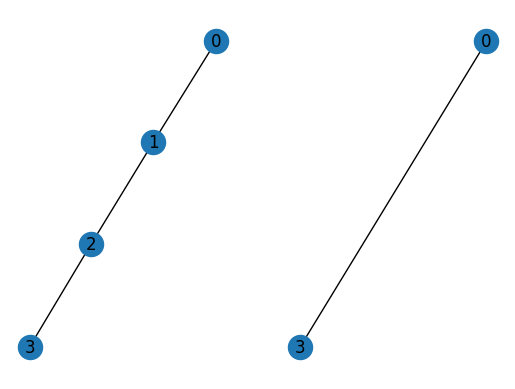

In [40]:
if __name__ == '__main__':
    ExampleGraph = nx.path_graph(4)
    fix,axes = plt.subplots(1,2)
    
    print("P_4 on the left, and shortened P_4 on the right")

    nx.draw_kamada_kawai(ExampleGraph, with_labels = True, ax=axes[0])
    _ShortenPath(ExampleGraph, nx.path_graph(4))
    nx.draw_kamada_kawai(ExampleGraph, with_labels = True, ax=axes[1])

ShortenAllPaths is a helper function for ShrinkGraph. It takes all sub-paths in a graph and makes them at most P_2s.

As a note, this has the consequence that terminal cycles are also reduced to at most a C_3.

In [41]:
def _ShortenAllPaths(Graph):
    #INPUT
    #
    #Graph - a networkx graph object
    #   This is used as the graph under inspection
    #
    #OUTPUT
    #
    #Graph - a networkx graph object
    #   This is the input graph, but with all of the sub-paths shortened to at most a P_2
    
    #First we start by creating a copy of the input graph, so we don't alter it in any way
    GraphCopy = copy.deepcopy(Graph)
    
    #We will inspect only the vertices in the input graph of degree 1 and 2, since paths have no vertices of degree 3 or higher
    LowDegVerts = _GetLowDegVerts(Graph)
    
    #We will iterate through the connected components of the subgraph induced by these low degree vertices
    Paths = copy.deepcopy(Graph.subgraph(LowDegVerts))
    
    #And we shorten all of the valid paths
    [_ShortenPath(Graph, Paths.subgraph(Component)) for Component in nx.connected_components(Paths) if (len(Component)>2 and isPath(Paths.subgraph(Component)))]
            
    #Once we've gone through each of the connected components, we return the graph
    return Graph

To demonstrate ShortenAllPaths, we observe that the extended zim graph has it's terminal cycle collapsed to a C_3, and the terminal paths collapsed to P_3s.

Mutated Zim graph on the left, and the condensed mutated Zim graph is on the right


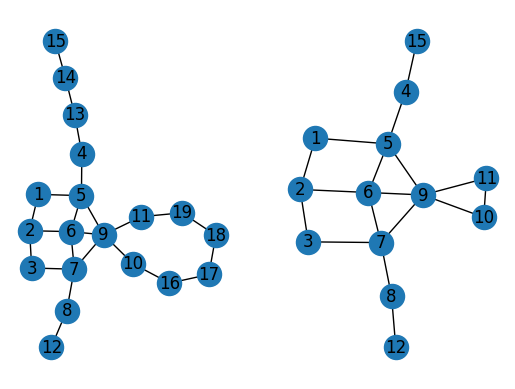

In [42]:
if __name__ == '__main__':
    ExampleGraph = MutatedZimGraph()
    fix,axes = plt.subplots(1,2)
    print("Mutated Zim graph on the left, and the condensed mutated Zim graph is on the right")

    nx.draw_kamada_kawai(ExampleGraph, with_labels = True,ax=axes[0])
    _ShortenAllPaths(ExampleGraph)
    nx.draw_kamada_kawai(ExampleGraph, with_labels = True,ax=axes[1])

TrimAllTerminalPaths is a helper function for ShrinkGraph. It takes all terminal paths of a given input graph and deletes the vertices on these terminal paths with degree 1.

In [43]:
def _TrimAllTerminalPaths(Graph):
    #INPUT
    #
    #Graph - a networkx graph object
    #   This is used as the graph under inspection
    #
    #OUTPUT
    #
    #Graph - a networkx graph object
    #   This is the input graph, but with terminal paths shortened by one
    
    Graph.remove_nodes_from([
        Vertex for Vertex,Degree in Graph.degree() if Degree==1 and max([
            Degree for Vertex,Degree in Graph.degree(Graph.neighbors(Vertex))
        ])==2
    ])
    return Graph

To demonstrate TrimAllTerminalPaths, we observe that the extended Zim graph has its terminal paths shortened by one vertex, but the terminal cycle is unaffected.

Mutated Zim graph on the left, and the trimmed mutated Zim graph is on the right


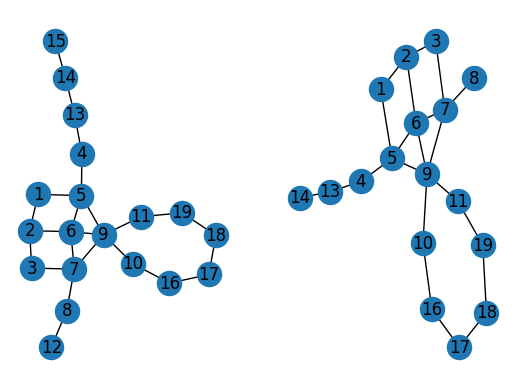

In [44]:
if __name__ == '__main__':
    ExampleGraph = MutatedZimGraph()
    fix,axes = plt.subplots(1,2)
    print("Mutated Zim graph on the left, and the trimmed mutated Zim graph is on the right")

    nx.draw_kamada_kawai(ExampleGraph, with_labels = True,ax=axes[0])
    nx.draw_kamada_kawai(_TrimAllTerminalPaths(ExampleGraph), with_labels = True,ax=axes[1])

ShrinkGraph is a helper function for power domination. It takes the input graph and shortens all sub-paths and all terminal paths to at most a P_2.

In [45]:
def _ShrinkGraph(Graph):
    #INPUT
    #
    #Graph - a networkx graph object
    #   This is used as the graph under inspection
    #
    #OUTPUT
    #
    #GraphCopy - a networkx graph object
    #   This is a deep copy of the input graph, sub-paths shortened to at most P_4s and terminal paths reduced to leaves
    
    
    #First we start by creating a copy of the input graph, so we don't alter the original in any way
    GraphCopy = copy.deepcopy(Graph)
    
    #Then we condense all sub-paths to at most P_2s
    GraphCopy = _ShortenAllPaths(GraphCopy)
    
    #Then we remove the degree 1 vertices of terminal paths of length at least 3
    #Since we shortened, and then trimmed, this has the effect of reducing all terminal paths to be P_2s as well as all sub paths
    GraphCopy = _TrimAllTerminalPaths(GraphCopy)
    
    #Once all of this is done, we may return the altered graph
    return GraphCopy

To demonstrate ShrinkGraph, we observe that shrinking the extended Zim graph yields in an isomorphic graph to the Zim graph.

Mutated Zim graph on the left, and the condensed mutated Zim graph is on the right


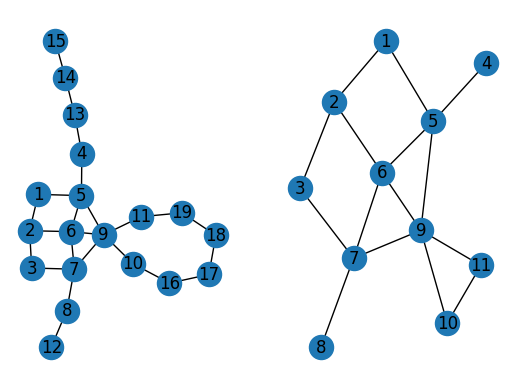

In [46]:
if __name__ == '__main__':
    ExampleGraph = MutatedZimGraph()
    fix,axes = plt.subplots(1,2)
    print("Mutated Zim graph on the left, and the condensed mutated Zim graph is on the right")

    nx.draw_kamada_kawai(ExampleGraph, with_labels = True,ax=axes[0])
    nx.draw_kamada_kawai(_ShrinkGraph(ExampleGraph), with_labels = True,ax=axes[1])

In [47]:
if __name__ == '__main__':
    print(f"These graphs are isomorphic: {nx.is_isomorphic(_ShrinkGraph(MutatedZimGraph()), ZimGraph())}")

These graphs are isomorphic: True


The next 3 functions all fascilitate the management of multiple processes. For this reason, the examples are for maintaining functionality in future revisions.

The _PDSIterator function is used to allocate potential power dominating sets to the different processes in a round-robin manner, starting with subsets with preferred vertices and vertices first in the VertexList.

The _PDSHelper function is called to inspect each of the assigned potential power dominating sets. When a valid PDS is found then it is dumped to file, and if no valid power dominating set is found in the assigned tasks a file is also written so that the calling function can be alerted of this as well.

In [48]:
def _PDSIterator(NumWorkers,PDVertices,VertexList,nAdditionalVertices,WorkerID):
    #INPUT
    #
    #NumWorkers - an integer
    #   This is going to be the number of processes to split into
    #PDVertices - a list of vertex labels
    #   This is the list of vertices to be appended to a potential power dominating set
    #VertexList - a list of vertex labels
    #   This is the vertices contained in Graph sorted by the likelihood function
    #nAdditionalVertices - an integer
    #   This is used as the number of vertices to add to PD vertices
    #WorkerID - an integer
    #   This is used as the number of jobs to skip because other processes will process that particular subset
    #
    #OUTPUT
    #
    #One by one a set of vertices are returned

    for counter,subset in enumerate(it.combinations(VertexList,nAdditionalVertices)):
        if counter%NumWorkers == WorkerID:
            yield list(PDVertices)+list(subset)
        else:
            continue

To demonstrate _PDSIterator(), observe that process 1 is given the subsets (9,5) and (9,2) to inspect and process 2 is given the subset (9.7) to inspect.

In [49]:
if __name__ == '__main__':
    NumWorkers = 2
    PDVertices = ('9')
    VertexList = ('5','7','2')
    nAdditionalVertices = 1
    for WorkerID in range(NumWorkers):
        print(f"Worker {WorkerID} is given the list {list(_PDSIterator(NumWorkers,PDVertices,VertexList,nAdditionalVertices,WorkerID))} to process.")

Worker 0 is given the list [['9', '5'], ['9', '2']] to process.
Worker 1 is given the list [['9', '7']] to process.


In [50]:
def _PDSHelper(Graph,NumWorkers,PDVertices,VertexList,nAdditionalVertices,WorkerID):
    #INPUT
    #
    #Graph - a networkx graph object
    #   This is used as the graph under inspection
    #NumWorkers - an integer
    #   This is going to be the number of processes to split into
    #PDVertices - a list of vertex labels
    #   This is the list of vertices to be appended to a potential power dominating set
    #VertexList - a list of vertex labels
    #   This is the vertices contained in Graph sorted by the likelihood function
    #nAdditionalVertices - an integer
    #   This is used as the number of vertices to add to PD vertices
    #WorkerID - an integer
    #   This is used as the number of jobs to skip because other processes will process that particular subset
    #
    #OUTPUT
    #
    #There is no output. If a power dominating set is found a file will be created that contains it, or a file will be created indicating no power dominating set was found.

    for subset in _PDSIterator(NumWorkers,PDVertices,VertexList,nAdditionalVertices,WorkerID):
        if isPDS(Graph,subset):
            with open(f"ValidPDS.worker-{WorkerID}.nAV-{nAdditionalVertices}.pickle", "wb") as OutputFile:
                pickle.dump(subset,OutputFile)
                return
        else:
            continue
    with open(f"NOPDS.worker-{WorkerID}.nAV-{nAdditionalVertices}.txt", "w") as OutputFile:
        OutputFile.write("")
    print(f"Worker {WorkerID} done")
    return

To demonstrate this function, we observe that a valid power dominating set of size 2 is found while none is found of size 1 for the Zim graph.

In [51]:
if __name__ == '__main__':
    Graph = ZimGraph()
    NumWorkers = 1
    PDVertices = ('9')
    VertexList = ('5','7','2')
    WorkerID = 0
    
    nAdditionalVertices = 0
    _PDSHelper(Graph,NumWorkers,PDVertices,VertexList,nAdditionalVertices,WorkerID)
    if os.path.isfile(f"ValidPDS.worker-{WorkerID}.nAV-{nAdditionalVertices}.pickle"):
        print(f"A valid PDS has been found with {nAdditionalVertices} additional vertices.")
        os.remove(f"ValidPDS.worker-{WorkerID}.nAV-{nAdditionalVertices}.pickle")
    elif os.path.isfile(f"NOPDS.worker-{WorkerID}.nAV-{nAdditionalVertices}.txt"):
        print(f"No valid PDS has been found with {nAdditionalVertices} additional vertices.")
        os.remove(f"NOPDS.worker-{WorkerID}.nAV-{nAdditionalVertices}.txt")
    
    nAdditionalVertices = 1
    _PDSHelper(Graph,NumWorkers,PDVertices,VertexList,nAdditionalVertices,WorkerID)
    if os.path.isfile(f"ValidPDS.worker-{WorkerID}.nAV-{nAdditionalVertices}.pickle"):
        print(f"A valid PDS has been found with {nAdditionalVertices} additional vertices.")
        os.remove(f"ValidPDS.worker-{WorkerID}.nAV-{nAdditionalVertices}.pickle")
    elif os.path.isfile(f"NOPDS.worker-{WorkerID}.nAV-{nAdditionalVertices}.txt"):
        print(f"No valid PDS has been found with {nAdditionalVertices} additional vertices.")
        os.remove(f"NOPDS.worker-{WorkerID}.nAV-{nAdditionalVertices}.txt")

Worker 0 done
No valid PDS has been found with 0 additional vertices.
A valid PDS has been found with 1 additional vertices.


_PDSWaiter is written to dynamically wait an amount of time before checking if the processes have completed all of their work. This is done by taking an amount of time to view all of the power dominating sets assigned to the first worker. The wait time is capped at 2 seconds for only the first wait with the anticipation that a valid power dominating set should be located quickly when checking subsets of the correct size.

This funciton is not given an example.

In [52]:
def _PDSWaiter(NumWorkers,PDVertices,VertexList,nAdditionalVertices):
    #INPUT
    #
    #NumWorkers - an integer
    #   This is going to be the number of processes to split into
    #PDVertices - a list of vertex labels
    #   This is the list of vertices to be appended to a potential power dominating set
    #VertexList - a list of vertex labels
    #   This is the vertices contained in Graph sorted by the likelihood function
    #nAdditionalVertices - an integer
    #   This is used as the number of vertices to add to PD vertices
    #
    #OUTPUT
    #
    #There is no output. This process checks the status of the _PDSHelper() processes periodically. The input parameters are used to wait a dynamic amount of time, if the processes are given more work then this will wait longer

    first_pass = True
    while True:

        # simulate the first process doing work
        dummy_counter = 0
        starting_time = time.time()
        for subset in _PDSIterator(NumWorkers,PDVertices,VertexList,nAdditionalVertices,0):
            
            # This allows a short-circuit that the causes a check after at most 2 seconds after the start of the search - because a PDS may be found rather quickly based on sorting the vertex set
            if first_pass:
                if time.time()-starting_time > 2:
                    first_pass = False
                    break

        # Look at the working directory for files that the different processes will make, categorized on whether a PDS was found or not
        valid_pds_files = []
        done_processes = []
        [valid_pds_files.append(file) for file in os.listdir() if "ValidPDS.worker-" in file and os.stat(file).st_size>0]
        [done_processes.append(file) for file in os.listdir() if "NOPDS.worker-" in file]

        # If at least on PDS was found, then stop all currently working child processes and return
        if len(valid_pds_files) > 0:
            # print("The process should end because something has been found")
            for child in multiprocessing.active_children():
                child.terminate()
            for child in multiprocessing.active_children():
                child.join()
            return
        elif len(done_processes)==NumWorkers:
            # print("The process should end because all the workers have returned)
            for child in multiprocessing.active_children():
                child.terminate()
            for child in multiprocessing.active_children():
                child.join()
            return

Here we come to the main process that spawns children to search for power dominating sets.

In [53]:
def _CheckForPDSOfSize(Graph,NumWorkers,PDVertices,VertexList,nAdditionalVertices):
    #INPUT
    #
    #Graph - a networkx graph object
    #   This is used as the graph under inspection
    #NumWorkers - an integer
    #   This is going to be the number of processes to split into
    #PDVertices - a list of vertex labels
    #   This is the list of vertices to be appended to a potential power dominating set
    #VertexList - a list of vertex labels
    #   This is the vertices contained in Graph sorted by the likelihood function
    #nAdditionalVertices - an integer
    #   This is used as the number of vertices to add to PD vertices
    #
    #OUTPUT
    #
    #PDS - a list of vertex labels that form a power dominating set or None if no power dominating set is found with the input number of vertices

    PDS = None
    Workers = []
    
    # This is where the separate processes are forked, each trying to find a power dominating set
    for WorkerID in range(NumWorkers):
        Worker = multiprocessing.Process(target=_PDSHelper, args=(Graph,NumWorkers,PDVertices,VertexList,nAdditionalVertices,WorkerID))
        Workers.append(Worker)
        Worker.start()
    _PDSWaiter(NumWorkers,PDVertices,VertexList,nAdditionalVertices)
    
    # Once all the workers have finished, check for any valid power dominating sets with the 
    found = False
    PDS_files = []

    # Gather all the files that the subprocesses created
    [PDS_files.append(f) for f in os.listdir('.') if os.path.isfile(f) and 'ValidPDS.worker-' in f]
    
    # Iterate through these files based off of their size, this fixes a bug where a process hasn't completed writing the pds to the file before being terminated
    for file in sorted(PDS_files, key=lambda file: os.stat(file).st_size, reverse=True):
        if not found:

            # Only record the first valid power dominating set that is found in the directory
            found = True
            with open(file, "rb") as input_file:
                PDS = pickle.load(input_file)

        # Remove the file
        os.remove(file)

    # Remove all the files for workers that did not find a pds
    [os.remove(file) for file in os.listdir() if os.path.isfile(file) and "NOPDS.worker-" in file]
    return PDS

Due to the limitations of the jupyter notebook runtime environment, this funciton must be tested by importing the .py file directly. This is done with having the notebook file in the same location as PowerDominationToolbox and importing it as PDT. This limitation is present anytime processes are spawned, as python 3.8 has implimented some requirements on the calling environment that the notebook environment doesn't satisfy.

['9', '5'] is a valid power dominating set of the Zim graph


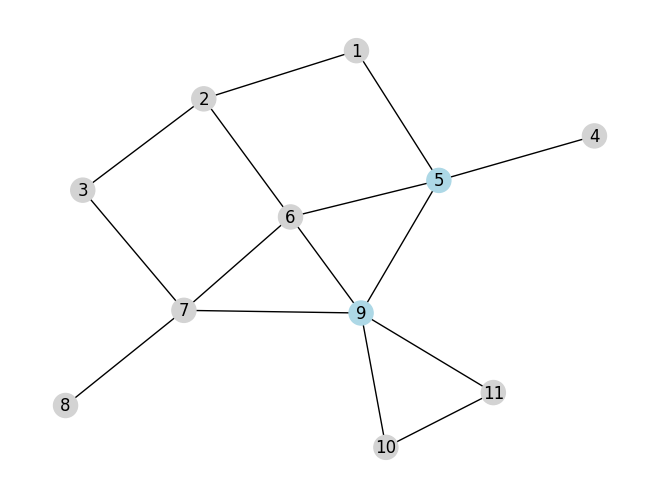

In [54]:
importlib.reload(PDT)

if __name__ == '__main__':
    Graph = ZimGraph()
    NumWorkers = 1
    PDVertices = ('9')
    VertexList = ('5','7','2')
    nAdditionalVertices = 1
    
    PDS = PDT._CheckForPDSOfSize(Graph,NumWorkers,PDVertices,VertexList,nAdditionalVertices)
    
    print(f"{PDS} is a valid power dominating set of the Zim graph")

    ColorMap = [
        "lightblue" if Vertex in PDS else
        "lightgrey" for Vertex in Graph.nodes()
    ]

    nx.draw_kamada_kawai(Graph, node_color=ColorMap, with_labels=True)

Here is the first function in the main interface of the power domination toolbox. This returns a minimum power dominating set for an input graph.

In [55]:
def minpds(Graph, NumWorkers = None):
    #INPUT
    #
    #Graph - a networkx graph object
    #   This is used as the graph under inspection
    #NumWorkers - an integer (defaults to None)
    #   This is going to be the number of processes to split into
    #
    #OUTPUT
    #
    #PDS - an list of vertex labels
    #   This is a minimum power dominating set

    #If the number of workers isn't passed into the funciton, automatically determine it
    if NumWorkers == None:
        NumWorkers = max(1,multiprocessing.cpu_count()-1)

    Graph = _ShrinkGraph(Graph)

    PDVertices = _FindPreferredVertices(Graph)

    VertexList = _SortValidNonPreferredVertices(Graph,PDVertices)

    # Starting with the set of preferred vertices (0 additional), check for a pds by successively adding an additional vertex
    for nAdditionalVertices in range(Graph.number_of_nodes()):
        PDS = _CheckForPDSOfSize(Graph,NumWorkers,PDVertices,VertexList,nAdditionalVertices)
        if PDS == None:
            continue
        else:
            return PDS

    return

Due to limitations of the Jupyter notebook environment, this function must also be referenced by importing the .py file directly.

['9', '5'] is a valid power dominating set of the Zim graph


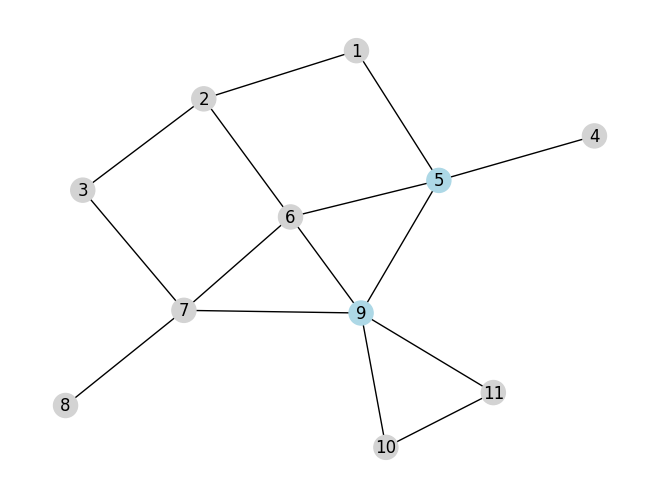

In [56]:
importlib.reload(PDT)

if __name__ == '__main__':
    Graph = ZimGraph()
    
    PDS = PDT.minpds(Graph)
    
    print(f"{PDS} is a valid power dominating set of the Zim graph")

    ColorMap = [
        "lightblue" if Vertex in PDS else
        "lightgrey" for Vertex in Graph.nodes()
    ]

    nx.draw_kamada_kawai(Graph, node_color=ColorMap, with_labels=True)

This is the second main interface funciton that simply returns just the power domination number of a given graph

In [57]:
def pdn(Graph, NumWorkers = None):
    #INPUT
    #
    #Graph - a networkx graph object
    #   This is used as the graph under inspection
    #NumWorkers - an integer (defaults to None)
    #   This is going to be the number of processes to split into
    #
    #OUTPUT
    #
    #PDN - an integer
    #   This is the count of all the vertices in the given power dominating set for each of the connected components


    if NumWorkers == None:
        NumWorkers = max(1,multiprocessing.cpu_count()-1)

    #Semantically, the power dominating number is the length of a minimum power dominating set, so we have to find a minimum power dominating set
    PDN = len(minpds(Graph, NumWorkers))

    #Now we can return this number
    return PDN

In [58]:
importlib.reload(PDT)

if __name__ == '__main__':
    Graph = ZimGraph()
    
    PDN = PDT.pdn(Graph)
    
    print(f"The power domination number of the Zim graph is {PDN}")

The power domination number of the Zim graph is 2


The next 3 functions fascilitate the parallelized process of finding all minimum power dominating sets of a given input graph

_work_generator is a modified version of _PDSIterator that allocates elements of the input generator to processes in a round-robin manner

_ParallelFindAllMinPDSPart is the funciton that the processes run to determine the valid power dominating sets that they're assigned.

_ParallelFindMinPDSFinish is used to join all of the different parts into one list that contains all minimum power dominating sets

In [59]:
def _work_generator(Generator, WorkerID, nWorkers):
    #INPUT
    #
    #Generator - any iterable object
    #   this is used as the thing that will be split up
    #WorkerID - an integer
    #   This is used as the number of jobs to skip because other processes will process that particular subset
    #nWorkers - an integer
    #   This is the number of pieces the Generator will be split into
    #
    #OUTPUT
    #
    #One by one the pieces to the given part of the generator

    for JobID,Job in enumerate(Generator):
        if (JobID % nWorkers) == WorkerID:
            #This worker is tasked with this job
            yield Job
        else:
            #Another worker is tasked with this job
            continue

To see this, we can see the round-robin nature of assigning elements of a list to different processes

In [60]:
if __name__ == '__main__':
    work = [1,2,3,4,5,6,7]
    task1 = list(_work_generator(work,0,2))
    print(f"Worker 1 is given {task1}")
    task2 = list(_work_generator(work,1,2))
    print(f"Worker 2 is given {task2}")
    

Worker 1 is given [1, 3, 5, 7]
Worker 2 is given [2, 4, 6]


In [61]:
def _ParallelFindAllMinPDSPart(Graph, PDN, ID, nWorkers):
    #INPUT
    #
    #Graph - a networkx graph object
    #   this is used as the graph to inspect
    #PDN - an integer
    #   This is the power domination number of the given graph
    #ID - an integer
    #   This is used as the worker ID for use in _work_generator()
    #nWorkers - an integer
    #   This is the number of workers available to inspect the graph
    #
    #OUTPUT
    #
    #There is no return persay, but a pickle file will be created with the following:
    #PDSs - a list of list of vertex labels
    #   This is all minimum power dominating sets of the given graph

    PDSs = []
    for vertices in _work_generator(it.combinations(Graph.nodes(),PDN), ID, nWorkers):
        if isPDS(Graph,vertices):
            PDSs.append(vertices)
    with open(f'all.pds.part.{ID}.pickle', 'wb') as OutputFile:
        pickle.dump(PDSs, OutputFile)
    return

This function is not given an example

In [62]:
def _ParallelFindMinAllPDSFinish():
    #INPUT
    #
    #Nothing
    #   This function will search the active directory for pickel files that contain minimum power dominating sets
    #
    #OUTPUT
    #
    #PDSs - a list of list of vertex labels
    #   This is the list of all minimum power dominating sets located

    PDSs = []
    for file in [f for f in os.listdir('.') if os.path.isfile(f) and 'all.pds.part.' in f]:
        Temp = []
        with open(file, 'rb') as InputFile:
            Temp = pickle.load(InputFile)
        for PDS in Temp:
            PDSs.append(PDS)
        os.remove(file)
    return PDSs

This function is not given an example

Now we have the last interface funciton of the power domiantion toolbox. This returns all minimum power dominating sets of an input graph.

In [63]:
def allminpds(Graph, PDN = None, NumWorkers = None):
    #INPUT
    #
    #Graph - a networkx graph object
    #   This is used as the graph to be inspected
    #PDN- an integer (defaults to None)
    #   This is the power domination number of the input graph, if none is given it is determined
    #NumWorkers - an integer (defaults to None)
    #   This is the number of workers that can be allocated to determining all minimum power dominating sets, if none is given, it is determined

    if PDN == None:
        PDN = pdn(Graph, NumWorkers)

    if NumWorkers == None:
        NumWorkers = min(1,multiprocessing.cpu_count()-1)
        
    Workers = []
    for ID in range(NumWorkers):
        Worker = multiprocessing.Process(target=_ParallelFindAllMinPDSPart, args=(Graph, PDN, ID, NumWorkers))
        Worker.start()
        Workers.append(Worker)
    for Worker in Workers:
        Worker.join()
    return _ParallelFindMinAllPDSFinish()

Like the other interface functions, we must call this function from the imported power domination toolbox. Observer the 13 minimum power domianting sets of the Zim graph.

In [64]:
importlib.reload(PDT)

if __name__ == '__main__':
    Graph = ZimGraph()
    
    minPDSs = PDT.allminpds(Graph)
    
    print(f"The following are all {len(minPDSs)} of the minimum power dominating sets of the Zim graph:\n{minPDSs}")

The following are all 13 of the minimum power dominating sets of the Zim graph:
[('1', '9'), ('2', '9'), ('2', '10'), ('2', '11'), ('5', '9'), ('5', '10'), ('5', '11'), ('3', '9'), ('7', '9'), ('7', '10'), ('7', '11'), ('4', '9'), ('9', '8')]
